# Rolling Correlation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance 
from pandas_datareader import data as wb
import warnings
yfinance.pdr_override()
warnings.filterwarnings('ignore')

In [3]:
amrt_indf = pd.DataFrame()

In [19]:
tickers = ['INDF.jk', 'AMRT.jk']
for ticker in tickers : 
    amrt_indf[ticker] = wb.get_data_yahoo(f'{ticker}', start = '2007-01-01', end = '2022-12-31')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
amrt_indf.rename(columns ={'INDF.jk':'INDF',
                           'AMRT.jk':'AMRT'}, inplace = True)

In [34]:
amrt_indf.dropna(inplace = True)

In [69]:
amrt_indf.resample('M', kind = 'period').last().head(12)

,INDF,AMRT
Date,,
2009-01,980.0,40.0
2009-02,880.0,40.0
2009-03,940.0,35.5
2009-04,1280.0,35.0
2009-05,1780.0,40.0
2009-06,1930.0,38.5
2009-07,2275.0,41.0
2009-08,2500.0,41.0
2009-09,3025.0,42.0


In [37]:
month_return = amrt_indf.resample('M', kind ='period').last().pct_change()
month_return

,INDF,AMRT
Date,,
2009-01,NaN,NaN
2009-02,-0.102041,0.000000
2009-03,0.068182,-0.112500
2009-04,0.361702,-0.014085
2009-05,0.390625,0.142857


In [38]:
month_return.dropna(inplace = True)

## Calculating Regular Correlation With df.corr() method

In [39]:
month_return.corr()

,INDF,AMRT
INDF,1.000000,0.142149
AMRT,0.142149,1.000000


## Calculating Monthly Rolling Calculation

In [73]:
month_return.head(12).rolling(12).mean() * 12

,INDF,AMRT
Date,,
2009-02,NaN,NaN
2009-03,NaN,NaN
2009-04,NaN,NaN
2009-05,NaN,NaN
2009-06,NaN,NaN
2009-07,NaN,NaN
2009-08,NaN,NaN
2009-09,NaN,NaN
2009-10,NaN,NaN


In [43]:
month_return['INDF'].rolling(12).corr(month_return['AMRT'])

Date
2009-02         NaN
2009-03         NaN
2009-04         NaN
2009-05         NaN
2009-06         NaN
             ...   
2022-08   -0.100669
2022-09   -0.107573
2022-10    0.008250
2022-11   -0.006847
2022-12   -0.112543
Freq: M, Length: 167, dtype: float64

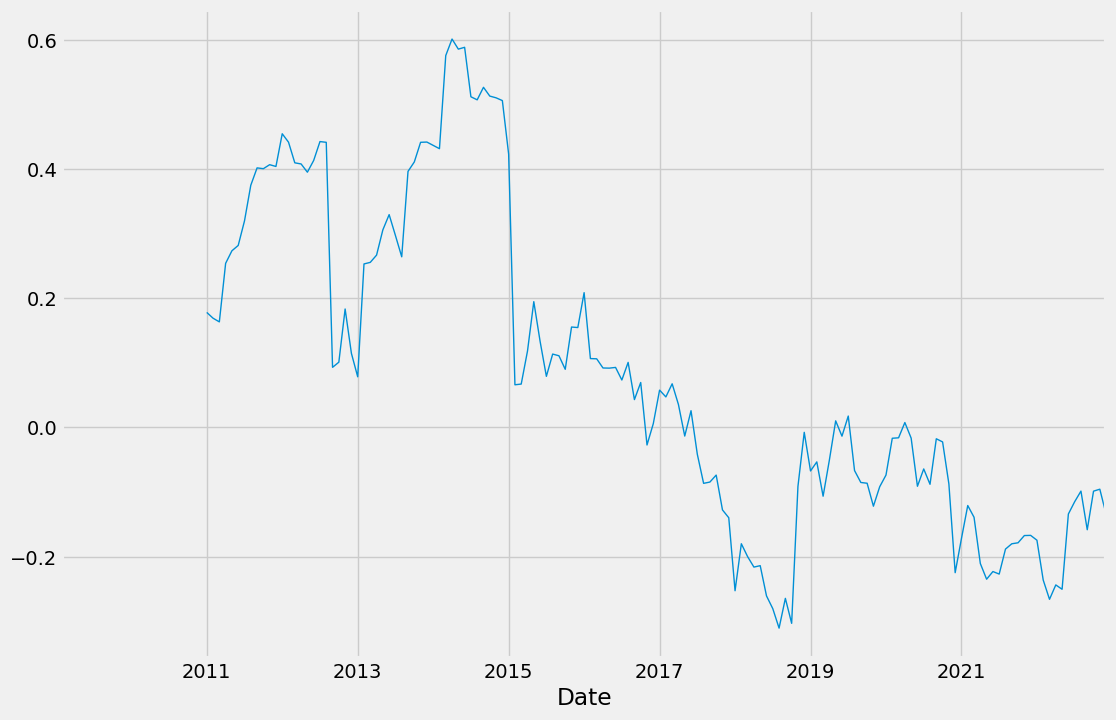

In [52]:
plt.style.use('fivethirtyeight')
month_return['INDF'].rolling(24).corr(month_return['AMRT']).plot(figsize = (12,8), linewidth = 1)
plt.show()